<a href="https://colab.research.google.com/github/AlejandroChandia/Conflict_LRP/blob/main/CPP_slopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.io as io
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from matplotlib import gridspec
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import pickle
import itertools
import glob

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.dates as dates
from scipy import stats
import pingouin as pg
from scipy.stats import variation
import math
from sklearn import preprocessing
from scipy.signal import butter, filtfilt
import itertools

In [ ]:
import matplotlib.pyplot as plt
#font = {'family': 'serif', 'serif': ['Palatino']}
font = {'family': 'serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [ ]:
label_fontsize = 16
title_fontsize = 16

In [ ]:
#Set up parameters for figure display
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.labelweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
pylab.rcParams["font.family"] = "serif"
pylab.rcParams["font.weight"] = "heavy"
#pylab.rcParams.update({'figure.autolayout': True})

In [ ]:
sns.set(font_scale=1.25, style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
base_dir='/content/gdrive/MyDrive/Mutual_Information/Colab_Notebooks/CPP_slope/'
beh_files = 'beh_data/csv_files/'
output_dir = 'figures/'

In [ ]:
df  = pd.read_csv(base_dir + beh_files + 'CPP_slope_stats_alert_WR.csv')

In [ ]:
df

,subj_idx,Congruent,Incongruent,difference
0,1,3.666053,4.118029,0.451976
1,2,3.797802,4.602310,0.804508
2,3,0.876720,0.717050,-0.159671
3,4,1.345938,0.607771,-0.738167
4,5,8.336431,7.439469,-0.896962
5,6,5.330070,7.785115,2.455045
6,7,4.746366,5.814020,1.067654
7,8,4.010371,2.597488,-1.412883
8,9,6.530672,8.081879,1.551207
9,10,11.176431,11.962377,0.785946


In [ ]:
# ==========================================
# 1) LOAD CSV WITH CPP SLOPES
# ==========================================
# Compute difference
df["difference"] = df["Incongruent"] - df["Congruent"]



# Ordenar el DataFrame por la columna de diferencia en orden descendente
df_sorted = df.sort_values(by='difference', ascending=False)

# Mostrar el resultado
print(df_sorted)

    subj_idx  Congruent  Incongruent  difference
10        11  -4.450646    -1.377536    3.073109
19        20   0.244774     2.820882    2.576107
5          6   5.330070     7.785115    2.455045
8          9   6.530672     8.081879    1.551207
11        12   3.074079     4.605649    1.531570
6          7   4.746366     5.814020    1.067654
20        21  -2.054847    -1.041675    1.013172
1          2   3.797802     4.602310    0.804508
9         10  11.176431    11.962377    0.785946
14        15   9.861304    10.544720    0.683416
16        17   9.972256    10.494758    0.522502
0          1   3.666053     4.118029    0.451976
23        24   0.374802     0.804315    0.429513
21        22   0.403595     0.318128   -0.085468
2          3   0.876720     0.717050   -0.159671
3          4   1.345938     0.607771   -0.738167
4          5   8.336431     7.439469   -0.896962
18        19   6.807484     5.519149   -1.288334
7          8   4.010371     2.597488   -1.412883
12        13  19.177

In [ ]:
print('Total subjects: ', len(df))
print('subjects with Incongruent CPP slope > Congruent CPP slope: ', np.sum(df['Incongruent'] > df['Congruent']))

Total subjects:  26
subjects with Incongruent CPP slope > Congruent CPP slope:  13


In [ ]:
res = pg.ttest(df['Congruent'],df['Incongruent'], paired = True, correction='auto')
res

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.814672,25,two-sided,0.422953,"[-0.5, 1.16]",0.05876,0.28,0.059574


In [ ]:
t_stat = res['T'].values[0]
p_val = res['p-val'].values[0]
df_test = res['dof'].values[0]
cohens_d = res['cohen-d'].values[0]
bf10 = res['BF10'].values[0]

In [ ]:
fig_dir = base_dir + output_dir
fig_dir

'/content/gdrive/MyDrive/Mutual_Information/Colab_Notebooks/CPP_slope/figures/'

/tmp/ipython-input-2828024724.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-2828024724.py:34: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.4`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


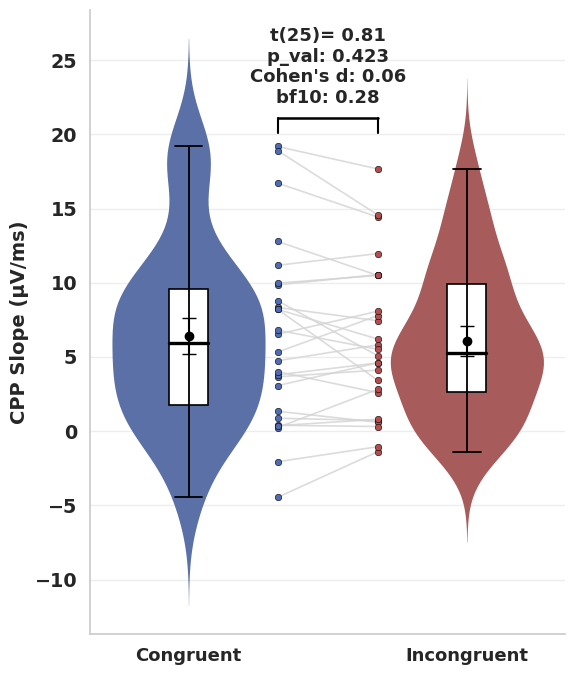

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem

# df → wide format
order = ["Congruent", "Incongruent"]
pal   = ["#4e6bb4", "#b44e4e"]

# Convertir a formato largo
df_long = pd.DataFrame({
    "subj_idx": np.concatenate([df.subj_idx, df.subj_idx]),
    "Slope": np.concatenate([df.Congruent, df.Incongruent]),
    "Congruency": ["Congruent"]*len(df) + ["Incongruent"]*len(df)
})

wide = df.set_index("subj_idx")[order]

# Calcular SEM
group_stats = df_long.groupby("Congruency")["Slope"].agg(
    mean="mean",
    sem=lambda x: sem(x, nan_policy="omit")
)

# ======================================================
# FIGURE LIKE ORIGINAL
# ======================================================
fig, ax = plt.subplots(figsize=(6,7))

# ---------------------------
# 1) VIOLIN ORIGINAL STYLE
# ---------------------------
sns.violinplot(
    x="Congruency", y="Slope",
    data=df_long, order=order,
    palette=pal,
    bw=0.4, cut=3, width=0.55,
    inner=None, linewidth=0,
    ax=ax
)

# ---------------------------
# 2) BOX PLOT ESTILO ORIGINAL
# ---------------------------
for i, cond in enumerate(order):
    vals = df_long[df_long["Congruency"]==cond]["Slope"].values

    q1 = np.percentile(vals, 25)
    q2 = np.percentile(vals, 50)
    q3 = np.percentile(vals, 75)

    # box delgado
    ax.add_patch(
        plt.Rectangle(
            (i - 0.07, q1),
            0.14, q3 - q1,
            facecolor="white",
            edgecolor="black",
            linewidth=1.2,
            zorder=10
        )
    )

    # mediana
    ax.plot([i-0.07, i+0.07], [q2, q2],
            color="black", linewidth=2.4, zorder=11)
# ============================
# 2b) WHISKERS REALES DEL BOXPLOT
# ============================

cap_width = 0.10   # Ancho del cap del whisker

for i, cond in enumerate(order):

    vals = df_long[df_long["Congruency"] == cond]["Slope"].values

    # Cuantiles
    q1 = np.percentile(vals, 25)
    q3 = np.percentile(vals, 75)
    iqr = q3 - q1

    # Whiskers "reales" estilo matplotlib/seaborn
    whisker_low  = np.min(vals[vals >= q1 - 1.5 * iqr])
    whisker_high = np.max(vals[vals <= q3 + 1.5 * iqr])

    # Línea vertical del whisker
    ax.plot([i, i], [whisker_low, whisker_high],
            color="black", linewidth=1.3, zorder=12)

    # Caps del whisker
    ax.plot([i - cap_width/2, i + cap_width/2],
            [whisker_low, whisker_low],
            color="black", linewidth=1.3, zorder=12)

    ax.plot([i - cap_width/2, i + cap_width/2],
            [whisker_high, whisker_high],
            color="black", linewidth=1.3, zorder=12)

# ---------------------------
# 3) MATCHED LINES
# ---------------------------
xL = 0.32
xR = 1 - 0.32

for _, row in wide.iterrows():
    ax.plot([xL, xR], row.values,
            color="lightgrey", alpha=0.8,
            linewidth=1.2, zorder=4)

# ---------------------------
# 4) DOTS EXACTAMENTE COMO EL ORIGINAL
# ---------------------------
ax.scatter(
    np.full(len(wide), xL), wide["Congruent"],
    s=22, color=pal[0], edgecolor="black",
    linewidth=0.4, zorder=7
)
ax.scatter(
    np.full(len(wide), xR), wide["Incongruent"],
    s=22, color=pal[1], edgecolor="black",
    linewidth=0.4, zorder=7
)

# ---------------------------
# 5) SEM (igual al RT original)
# ---------------------------
xpos = np.arange(2)
ax.errorbar(
    xpos, group_stats["mean"],
    yerr=group_stats["sem"],
    fmt="o", color="black",
    markersize=6, capsize=5, zorder=12
)

# ---------------------------
# 6) STAT BRACKET Y TEXTO
# ---------------------------
ymax = df_long["Slope"].max()
y_level = ymax + 0.1*(ymax)

ax.plot([xL, xL], [y_level-1, y_level], color="black", linewidth=1.5)
ax.plot([xR, xR], [y_level-1, y_level], color="black", linewidth=1.5)
ax.plot([xL, xR], [y_level, y_level], color="black", linewidth=1.8)

ax.text(
    (xL+xR)/2, y_level + 1,
    f"t({int(df_test)})= {t_stat:.2f}\n"
    f"p_val: {p_val:.3f}\n"
    f"Cohen's d: {cohens_d:.2f}\n"
    f"bf10: {bf10}",
    ha="center", fontsize=13, weight="bold"
)

# ---------------------------
# FORMATO
# ---------------------------
sns.despine()
ax.set_xlabel("")
ax.set_ylabel('CPP Slope (µV/ms)', fontsize=14, fontweight='bold')

ax.set_xticks([0,1])
ax.set_xticklabels(order, fontsize=13, weight="bold")
ax.grid(alpha=0.35, axis="y")

plt.tight_layout()
#plt.show()
########################################
########################################

########################################
# alert
pdf_file_path =fig_dir  +'CPP_Slope_alert_WR_violin.pdf'
#fig.savefig(pdf_file_path, dpi=600)
#fig.savefig(fig_dir + "RT_group_main_Rule_alert_violin" + ".png", format='png', dpi=600, transparent=False)
########################################
# drowsy
#pdf_file_path =fig_dir  +'CPP_Slope_drowsy_WR_violin.pdf'
#fig.savefig(pdf_file_path, dpi=600)
#fig.savefig(fig_dir + "RT_group_main_Rule_drowsy_violin" + ".png", format='png', dpi=600, transparent=False)
########################################
# alert
#pdf_file_path =fig_dir  +'CPP_Slope_alert_SD_violin.pdf'
#fig.savefig(pdf_file_path, dpi=600)
#fig.savefig(fig_dir + "RT_group_main_Rule_alert_violin" + ".png", format='png', dpi=600, transparent=False)
########################################
# drowsy
#pdf_file_path =fig_dir  +'CPP_Slope_drowsy_SD_violin.pdf'
#fig.savefig(pdf_file_path, dpi=600)
#fig.savefig(fig_dir + "RT_group_main_Rule_drowsy_violin" + ".png", format='png', dpi=600, transparent=False)

#plt.show()

In [ ]:
plt.savefig("CPP_slope_violin.svg", dpi=300, bbox_inches="tight")
